In [1]:
library(fpp)

Loading required package: forecast
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 

Loading required package: fma
Loading required package: tseries
Loading required package: expsmooth
Loading required package: lmtest


In [2]:
# read in the csv file
ds <- read.csv("data.csv", sep=",", header=TRUE)

# use zoo to convert the date "YYYY-MM" to a date
zoo <- read.zoo(ds, sep=",", FUN=as.yearqtr)

# us ts to convert the zoo object to ts object using the correct intervals
ts = ts(zoo, frequency=4, start=c(1980,1), end=c(2015, 4))

In [7]:
rev = ts[,3]
rev = log(rev)

## Check for T/S
There is definitely trend and seasonality. So this data needs to be transformed and maybe differenced

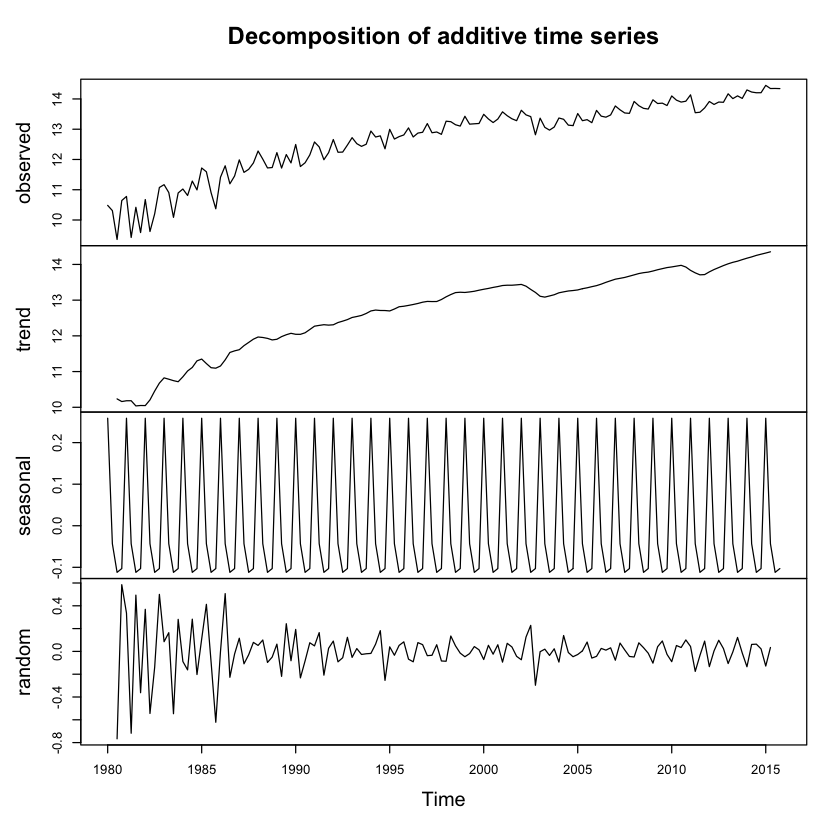

In [8]:
plot(decompose(rev))

## ADF of Raw Data
The ADF of the raw data shows that the data is non-stationary

In [9]:
adf.test(rev, alternative="stationary")


	Augmented Dickey-Fuller Test

data:  rev
Dickey-Fuller = -2.8158, Lag order = 5, p-value = 0.2368
alternative hypothesis: stationary


## Difference the data

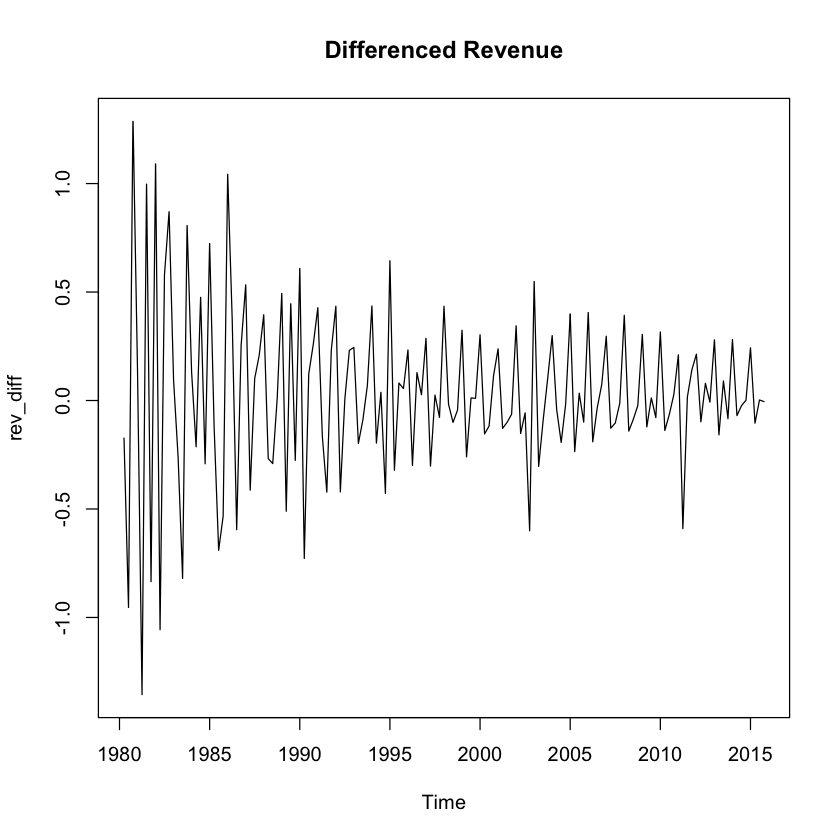

In [10]:
rev_diff = diff(rev)
plot(rev_diff, main="Differenced Revenue")

## ADF of Differenced Data
The ADF of the differenced data shows that we can reject the null hypo of the data being non-stationary since our p-value is smaller than .05. The differened data is stationary. Thus we can use ARIMA models.

In [11]:
adf.test(rev_diff)

Warning message in adf.test(rev_diff):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  rev_diff
Dickey-Fuller = -7.3931, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


## Auto ARIMA
Run an auto.arima just to see what it comes up with.

In [12]:
aa = auto.arima(rev, approximation=FALSE, trace=FALSE)
summary(aa)

Series: rev 
ARIMA(0,1,1)(0,0,2)[4] with drift         

Coefficients:
          ma1    sma1    sma2   drift
      -0.8188  0.1641  0.2530  0.0296
s.e.   0.0458  0.1032  0.0986  0.0063

sigma^2 estimated as 0.08464:  log likelihood=-25.06
AIC=60.11   AICc=60.55   BIC=74.93

Training set error measures:
                       ME      RMSE       MAE         MPE     MAPE      MASE
Training set -0.003462242 0.2858322 0.2004252 -0.06124081 1.710033 0.8305766
                    ACF1
Training set -0.05434022


## ACF/PACF of model
The ACF/PACF show that we have a model with residuals of white noise.

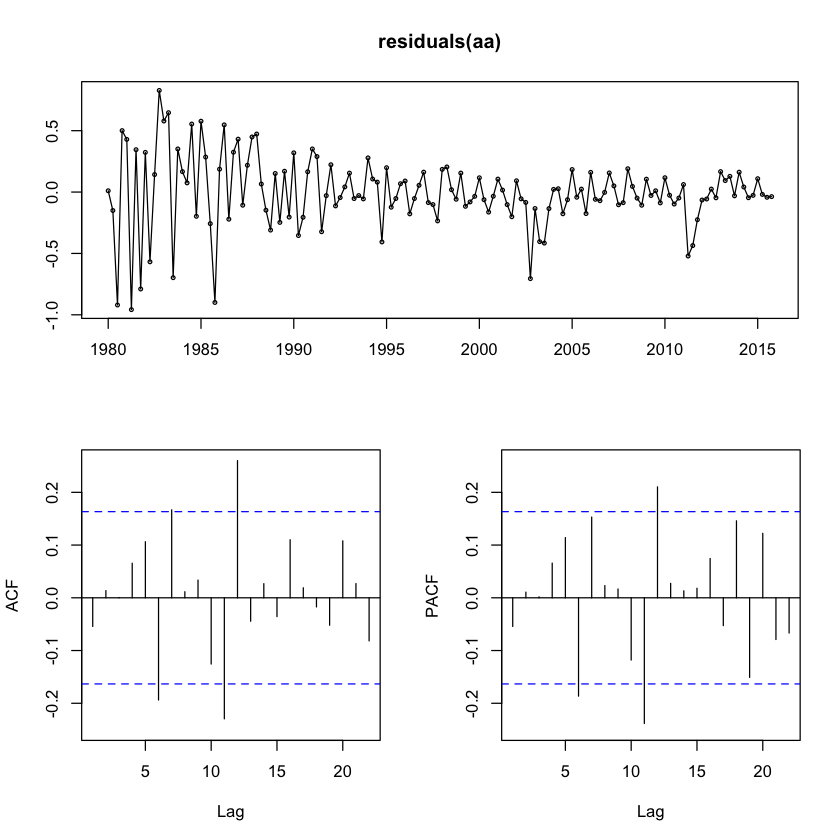

In [13]:
tsdisplay(residuals(aa))

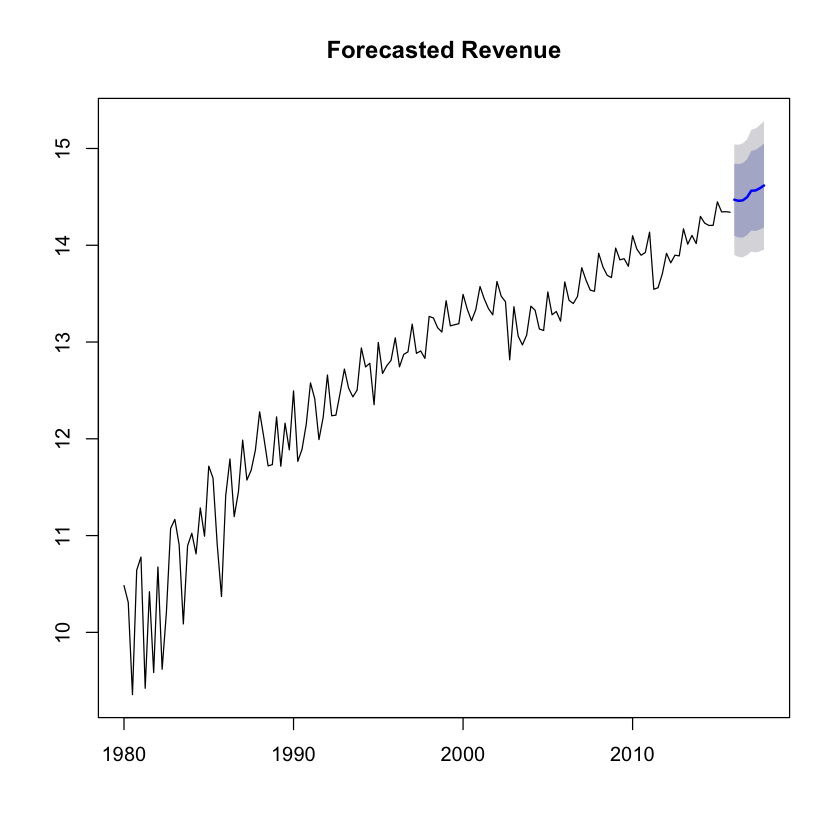

In [14]:
future = forecast(aa, 8)
plot(future, main="Forecasted Revenue")

In [15]:
future_exp = future

# Convert Mean back
future_exp$mean = exp(future_exp$mean)
# Convert Upper back
future_exp$upper = exp(future_exp$upper)
# Convert Lower back
future_exp$lower = exp(future_exp$lower)
# Convert Original ts back
future_exp$x=exp(future_exp$x)

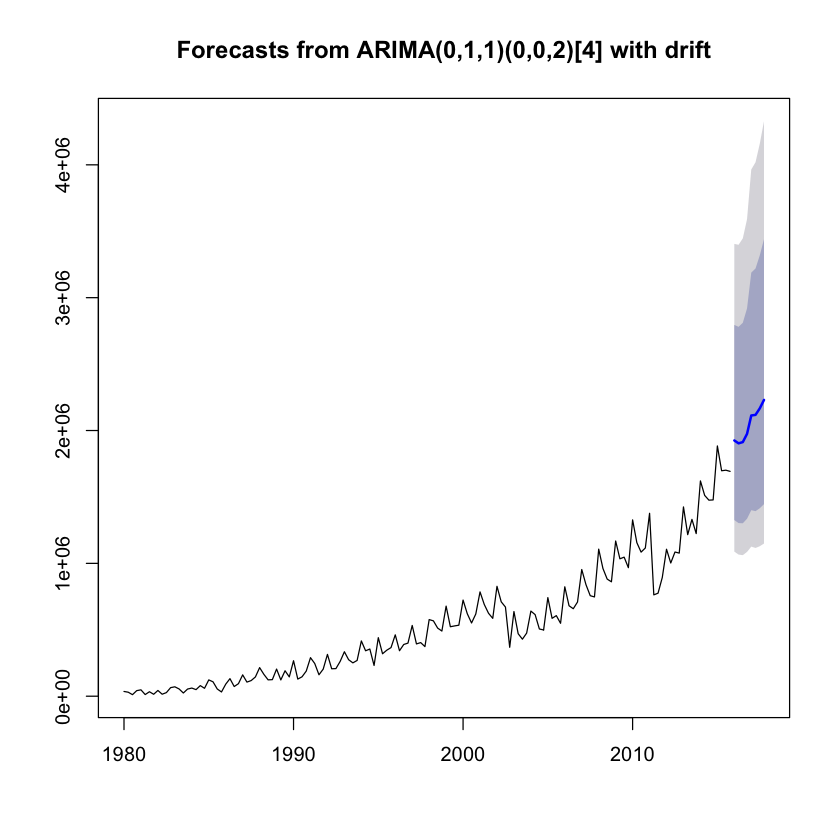

In [16]:
plot(future_exp)